In [341]:
# criar figura com valores de produtividade por regiao e área produzida
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Import the ticker module

In [342]:
altopantanal = pd.read_csv('altopantanal_MT_soja.txt', sep='\t')
altoparaguai = pd.read_csv('altoparaguai_MT_soja.txt', sep='\t')
altotelespires = pd.read_csv('altotelespires_MT_soja.txt', sep='\t')
arinos = pd.read_csv('arinos_MT_soja.txt', sep='\t')
aripuana = pd.read_csv('aripuana_MT_soja.txt', sep='\t')
canarana = pd.read_csv('canarana_MT_soja.txt', sep='\t')
jauru = pd.read_csv('jauru_MT_soja.txt', sep='\t')
paranatinga = pd.read_csv('paranatinga_MT_soja.txt', sep='\t')
parecis = pd.read_csv('parecis_MT_soja.txt', sep='\t')
rosariooeste = pd.read_csv('rosariooeste_MT_soja.txt', sep='\t')
sinop = pd.read_csv('sinop_MT_soja.txt', sep='\t')
tangaradaserra = pd.read_csv('tangaradaserra_MT_soja.txt', sep='\t')

# print(altopantanal)

In [343]:
list = []

municipios = [altopantanal, altoparaguai, altotelespires, arinos, aripuana, 
               canarana, jauru, paranatinga, parecis, rosariooeste, sinop, 
               tangaradaserra]

for j in municipios:
    ano = pd.Series(j['Ano']).dropna().unique()
    prod = pd.Series(j['Qtde Produzida']).dropna()
    area = pd.Series(j['Área']).dropna()

    data_dict_lists = {
        'Ano': pd.Series(ano),
        'Area': area.reset_index(drop=True),
        'Prod': prod.reset_index(drop=True)
    }
    
    df = pd.DataFrame(data_dict_lists)
    list.append(df)


In [344]:
print(list[0]['Ano'])

0     2003
1     2004
2     2005
3     2006
4     2007
5     2008
6     2009
7     2010
8     2011
9     2012
10    2013
11    2014
12    2015
13    2016
14    2017
15    2018
16    2019
17    2020
18    2021
19    2022
20    2023
Name: Ano, dtype: int64


In [345]:
pd.Series((list[2]['Prod'])/1000000)

0     2.697413
1     3.065018
2     3.854981
3     4.351634
4     4.611603
5     5.629699
6     5.275448
7     5.108445
8     5.813414
9     5.749555
10    5.892690
11    6.664597
12    6.355726
13    6.481091
14    6.790663
15    6.933214
16    6.860140
17    7.682212
18    7.810388
19    7.709254
20    8.550436
21    7.749852
22    7.867757
23    9.131467
Name: Prod, dtype: float64

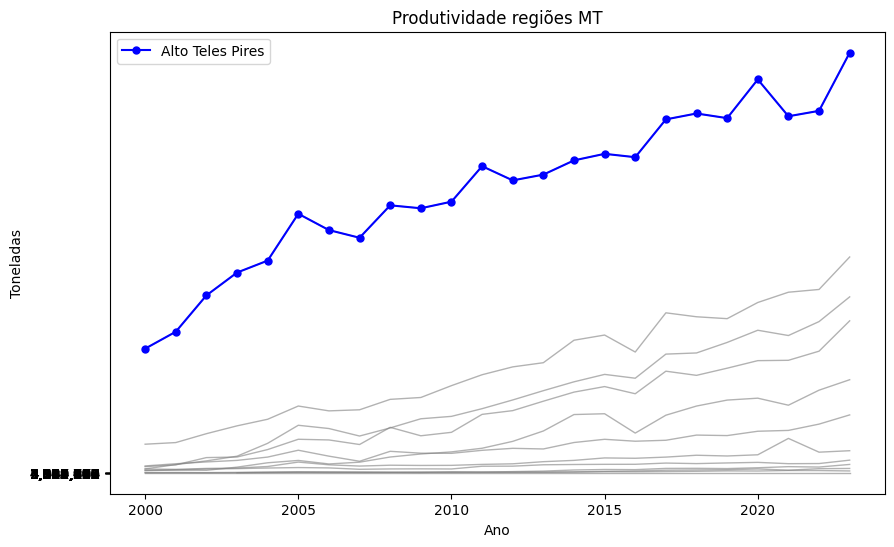

In [346]:
plt.figure(figsize=(10, 6)) # Set the figure size
for mun in range(0,12):
    plt.plot(list[mun]['Ano'], list[mun]['Prod'], 
             linestyle='-', color="grey", alpha=0.6, linewidth=1.0)

plt.plot(list[2]['Ano'], list[2]['Prod'], marker='o', linestyle='-', 
         markersize=5, label='Alto Teles Pires', 
         color="blue", linewidth=1.5)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.title('Produtividade regiões MT')
plt.xlabel('Ano')
plt.ylabel('Toneladas')
plt.legend()
#plt.grid(True)
plt.show()

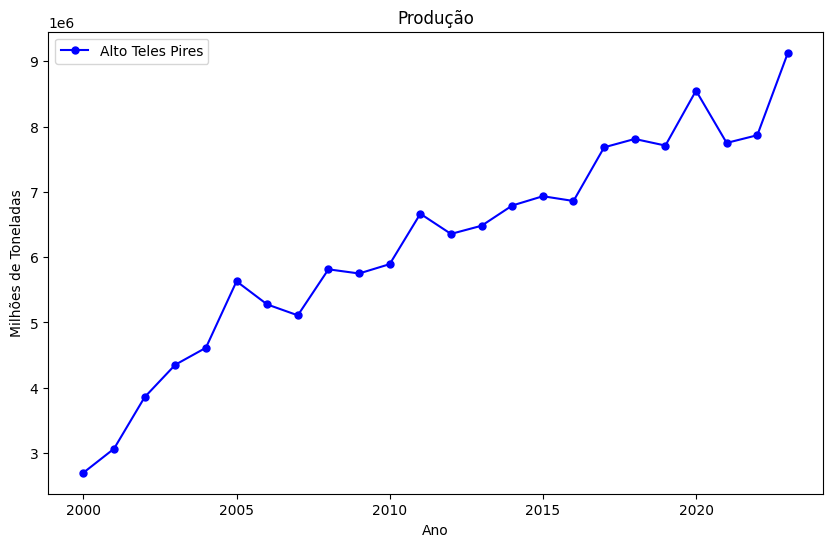

<Figure size 640x480 with 0 Axes>

In [357]:
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(list[2]['Ano'], list[2]['Prod'], marker='o', linestyle='-', 
         markersize=5, label='Alto Teles Pires', 
         color="blue", linewidth=1.5)
    
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.title('Produção')
plt.xlabel('Ano')
plt.ylabel('Milhões de Toneladas')
plt.legend()
#plt.grid(True)
plt.show()
plt.savefig("producao.png")

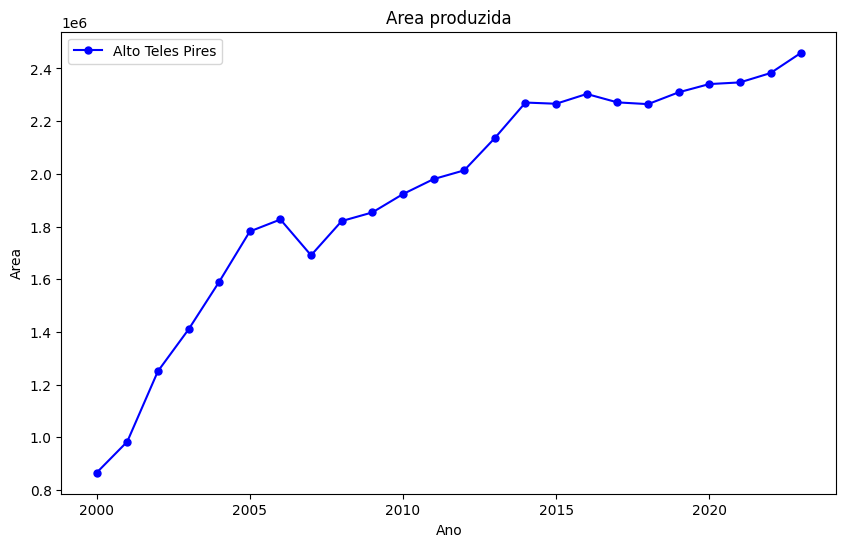

<Figure size 640x480 with 0 Axes>

In [358]:
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(list[2]['Ano'], list[2]['Area'], marker='o', linestyle='-', 
         markersize=5, label='Alto Teles Pires', 
         color="blue", linewidth=1.5)
    
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.title('Area produzida')
plt.xlabel('Ano')
plt.ylabel('Area')
plt.legend()
#plt.grid(True)
plt.show()
plt.savefig("area.png")

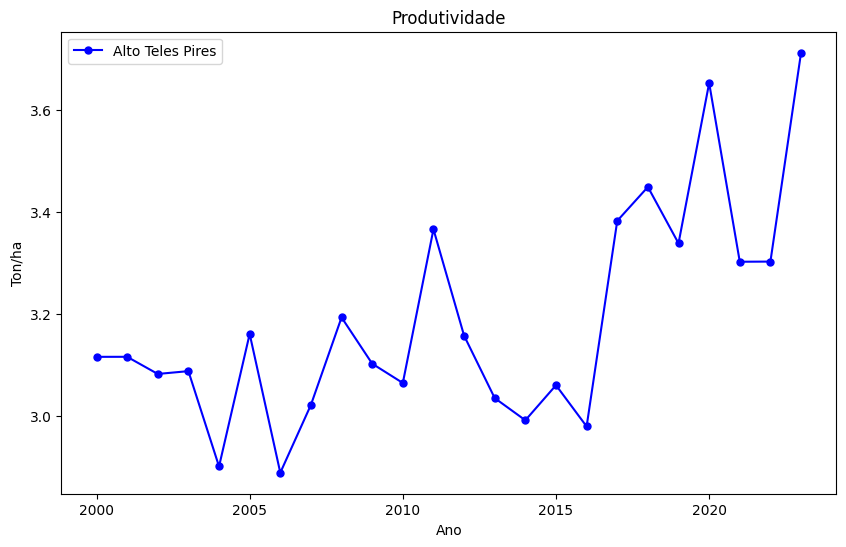

<Figure size 640x480 with 0 Axes>

In [361]:
# Produtividade

plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(list[2]['Ano'], list[2]['Prod']/list[2]['Area'], marker='o', linestyle='-', 
         markersize=5, label='Alto Teles Pires', 
         color="blue", linewidth=1.5)
    
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.title('Produtividade')
plt.xlabel('Ano')
plt.ylabel('Ton/ha')
plt.legend()
#plt.grid(True)
plt.show()
plt.savefig("produtividade.png")

In [362]:
produtividade_area_AT_MT = list[2]['Prod']/list[2]['Area']
np.savetxt('produtividade_area_AT_MT.txt', produtividade_area_AT_MT, delimiter=',', fmt='%.2f')